### Multi Linear Regression
Problem Statement: We need to find the price of the property by utilizing the independent features

Predict the price for:
- 3000 sqrft area, 3 bedrooms, 40 years old
- 2500 sqrft area,4 bedrooms, 5 years old

In [1]:
#Importing the necessary dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
from sklearn.linear_model import LinearRegression

- Reading our dataset

In [2]:
#Reading the csv
df = pd.read_csv('homeprices.csv')

- First few samples from our data

In [3]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


- Describing the DataFrame

In [4]:
#Describing the DataFrame
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


##### Documentation
- According to the sklearn docs, the features should not be dependant on each other
- As features dependant on each other would lead to singularity and high variance
- Let's check if we can each other are related to each other using correlation


In [5]:
df.corr()

,area,bedrooms,age,price
area,1.000000,0.753288,-0.445300,0.901476
bedrooms,0.753288,1.000000,-0.876614,0.923789
age,-0.445300,-0.876614,1.000000,-0.734167
price,0.901476,0.923789,-0.734167,1.000000


- We can observe the corrrelation

#### Variance Inflation Factor (VIF)

##### Why VIF ?

 Multicollinearity Check:
 
While linear regression assumes no multicollinearity, strong correlations among features (area, bedrooms, and age) could lead to unstable coefficient estimates.

Use Variance Inflation Factor (VIF) to quantify multicollinearity. A VIF > 5 indicates that multicollinearity is problematic.

If VIF indicates multicollinearity, consider removing or combining correlated features.
##### What is VIF?
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity.

A VIF of:

1: No multicollinearity.

1–5: Moderate multicollinearity (acceptable).

'>5': High multicollinearity (problematic, consider action).

'>10': Serious multicollinearity (strong action required).

In [6]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

#### Data Preprocessing
##### MissingDataError  
- We will get the **Missing Data Error** if we have any missing values or values that denote infinity
- Thus we need to resolve the missing values to calculate the VIF

In [7]:
#Filled in the missing values
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


- Selecting Independent Variables

In [14]:
#selecting independent variables
x = df[['area', 'bedrooms', 'age']]

,const,area,bedrooms,age
0,1.0,2600,3.0,20
1,1.0,3000,4.0,15
2,1.0,3200,4.0,18
3,1.0,3600,3.0,30
4,1.0,4000,5.0,8
5,1.0,4100,6.0,8


##### What add_constant(X) Does:
- The add_constant function adds a new column called const to the dataset.
- This column contains all 1.0s. It’s essentially an intercept term used in regression models.
- Without it, the regression assumes the line passes through the origin, which is rarely desirable in real-world data.

In [27]:
def vif(x):
    #Importing the necessary modules for VIF
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools import add_constant

    #Add Constant to the data
    X_with_constant = add_constant(x)

    # Creating empty dataframes
    vif_data = pd.DataFrame()
    
    #Storing the features in our empty dataset
    vif_data['Features'] = x.columns

    #Calculating the VIF
    vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values,i+1) for i in range(len(x.columns))]

    return(vif_data)

In [18]:
#Printing the data
vif(vif_data)

   Features        VIF
0      area   4.236937
1  bedrooms  14.737718
2       age   7.995310


##### Addressing the correlation

<Axes: >

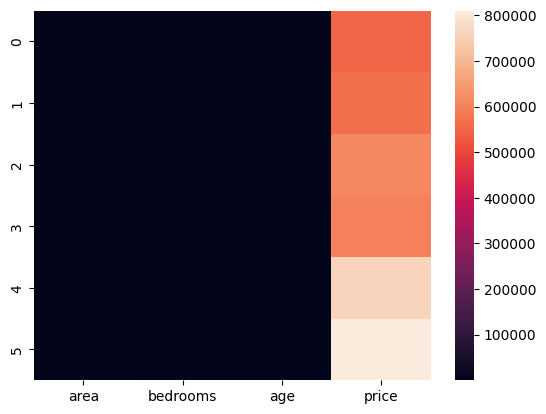

In [19]:
import seaborn as sns

sns.heatmap(data=df)

#### Observation
- The area,bedrooms and age are co-related to each other.
- price appears to have stronger relationships (lighter colors) with all other features (area, bedrooms, and age).
- age may have a weaker relationship (darker shades) with area or bedrooms.

#### Observation
- Since as area increases the price increases
- Age of land increases the price decreases, it's good to combine both the feature

##### Approach

Combining area and age makes sense because their relationship with price is complementary and can potentially reduce multicollinearity. Here's how you can combine them and proceed:

How to Combine area and age
Create a new feature, such as area_age_interaction, that captures the combined effect of these two variables. Since area has a positive relationship and age has a negative relationship with price, you can combine them as:

**area_age_interaction = area − 𝑘 ⋅ age**


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Normalize the features
scaler = StandardScaler()

In [22]:
df[['age','area']] = scaler.fit_transform(df[['age','area']])

In [23]:
df[['age','area']]

,age,area
0,0.462573,-1.521622
1,-0.198246,-0.776338
2,0.198246,-0.403696
3,1.784210,0.341589
4,-1.123392,1.086873
5,-1.123392,1.273194


In [24]:
#Create combined features
df['area_age_interaction'] = df['area'] - df['age']

#Update the dataset
x = df[['area_age_interaction','bedrooms']]

In [25]:
x.head()

,area_age_interaction,bedrooms
0,-1.984195,3.0
1,-0.578092,4.0
2,-0.601941,4.0
3,-1.442622,3.0
4,2.210264,5.0


In [28]:
vif(x)

,Features,VIF
0,area_age_interaction,12.187279
1,bedrooms,12.187279


In [30]:
correlation_matrix = x.corr()
print(correlation_matrix)

                      area_age_interaction  bedrooms
area_age_interaction              1.000000  0.958096
bedrooms                          0.958096  1.000000


#### Observation
- The reason we have 6 datas, we are facing the higher **VIF**, even though we tried to Standardize Data

#### Building the model

In [34]:
reg = LinearRegression()

In [35]:
reg.fit(df[['age','area','bedrooms']],df['price'])

LinearRegression()

In [37]:
reg.coef_

array([-24452.38304739,  60144.81726336,  23388.88007794])

In [38]:
reg.intercept_

550879.6663419203

#### Predicting the House Price

In [39]:
#Price 1
predict_price1 = pd.DataFrame({'age':[40],'area':[3000],'bedrooms':[3]})

#Price 2
predict_price2 = pd.DataFrame({'age':[5],'area':[2500],'bedrooms':[4]})

In [42]:
#Predict the price for house 1
prediction = reg.predict(predict_price1)

print(f"First House Prediction {prediction[0]:.0f}")

First House Prediction 180077403


In [43]:
#Predict the price for house 2
prediction = reg.predict(predict_price2)

print(f'Second House Prediction {prediction[0]:.0f}')

Second House Prediction 150884216


In [45]:
#Manual Prediction for House 1
(-24452.38304739 * 40 +  60144.81726336 * 3000 + 23388.88007794 * 3 ) + 550879.6663419203

180077402.77476013

In [46]:
#Manual Prediction for House 1
(-24452.38304739 * 5 +  60144.81726336 * 2500 + 23388.88007794 * 4 ) + 550879.6663419203

150884216.42981675

#### Conclusion
- We loaded the data
- described the data
- pre-processed the data
- Checked for multi linearity check
- Checked co-relation matrix
- Built the model
- Predicted the model